In [1]:
pip install yfinance pandas scikit-learn matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
# EUR/USD verisini indir
eur_usd = yf.download('EURUSD=X', period='1y', interval='1d')

# EMA hesapla
eur_usd['EMA_50'] = eur_usd['Close'].ewm(span=50, adjust=False).mean()
eur_usd['EMA_200'] = eur_usd['Close'].ewm(span=200, adjust=False).mean()

# bir sonraki günün fiyatı
eur_usd['Target'] = eur_usd['Close'].shift(-1)


eur_usd = eur_usd.dropna()


[*********************100%%**********************]  1 of 1 completed


In [4]:

features = ['EMA_50', 'EMA_200']
X = eur_usd[features]
y = eur_usd['Target']

# Veri setini bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Model oluşturma ve eğitim
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Tahminler
predictions = model.predict(X_test_scaled)

#performans
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Ortalama Kare Hatası (MSE): {mse}')
print(f'Ortalama Mutlak Hata(MAE): {mae}')
print(f'r2 : {r2}')


Mean Squared Error (MSE): 5.8783141316831964e-05
Mean Absolute Error (MAE): 0.006083302672002679
: -0.3666329905608665


Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1455
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0569 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9438 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8034 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6181 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3961 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1684 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0351 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0354 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137 
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

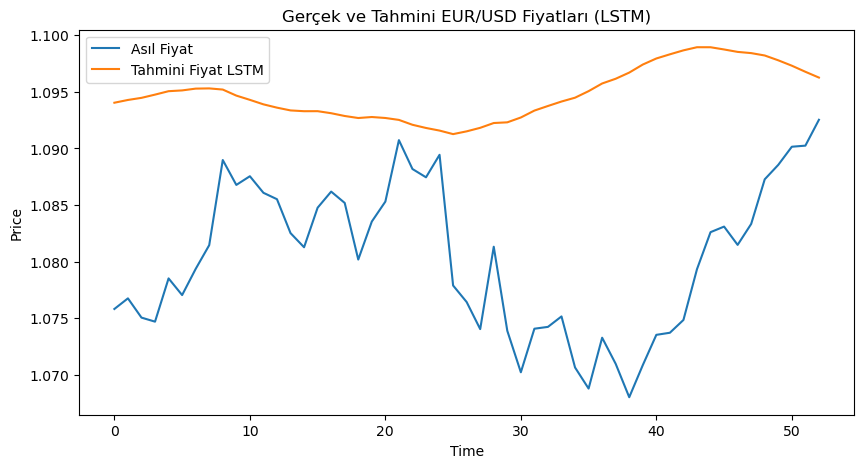

Ortalama Kare Hatası (MSE): 0.00025957130332564173
Ortalama Mutlak Hata(MAE): 0.014475912418005601
r2: -5.034701422568032


In [9]:
# LSTM modeli
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

# Model derleme
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# veriyi boyutlandırma
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Modeli eğitme
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32)

# Tahminler
predictions_lstm = model_lstm.predict(X_test_lstm)

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Asıl Fiyat')
plt.plot(predictions_lstm, label='Tahmini Fiyat LSTM')
plt.title('Gerçek ve Tahmini EUR/USD Fiyatları (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


mse_lstm = mean_squared_error(y_test, predictions_lstm)
mae_lstm = mean_absolute_error(y_test, predictions_lstm)
r2_lstm = r2_score(y_test, predictions_lstm)

print(f'Ortalama Kare Hatası (MSE): {mse_lstm}')
print(f'Ortalama Mutlak Hata(MAE): {mae_lstm}')
print(f'r2: {r2_lstm}')


In [10]:
def calculate_next_ema(data, span):
    alpha = 2 / (span + 1)
    next_ema = data.ewm(span=span, adjust=False).mean().iloc[-1] * (1 - alpha) + data.iloc[-1] * alpha
    return next_ema

# Bugün EMA
today_ema_50 = eur_usd['EMA_50'].iloc[-1]
today_ema_200 = eur_usd['EMA_200'].iloc[-1]

# Yarının EMA hesapla
next_close = model_lstm.predict(X_test_lstm[-1].reshape(1, X_test_lstm.shape[1], 1))[0][0]
next_ema_50 = calculate_next_ema(eur_usd['Close'], 50)
next_ema_200 = calculate_next_ema(eur_usd['Close'], 200)

print(f"Bugünün EMA 50: {today_ema_50}, EMA 200: {today_ema_200}")
print(f"Yarının EMA 50: {next_ema_50}, EMA 200: {next_ema_200}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Bugünün EMA 50: 1.0796943317900878, EMA 200: 1.0836381874399517
Yarının EMA 50: 1.0801083175604023, EMA 200: 1.0837039862607791


In [11]:
# Bugünün kapanış fiyatını al
today_close = eur_usd['Close'].iloc[-1]

# Yarının kapanış fiyatını tahmin et (LSTM kullanarak)
next_close = model_lstm.predict(X_test_lstm[-1].reshape(1, X_test_lstm.shape[1], 1))[0][0]

print(f"Bugünün kapanış fiyatı: {today_close}")
print(f"Yarının tahmin edilen kapanış fiyatı: {next_close}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Bugünün kapanış fiyatı: 1.0902509689331055
Yarının tahmin edilen kapanış fiyatı: 1.0962692499160767


In [ ]:

import time

def calculate_ema(data, span):
    return data.ewm(span=span, adjust=False).mean().iloc[-1]

def get_ema_values():
    while True:
        try:
            # EUR/USD verisini indir (son bir yıl)
            eur_usd = yf.download('EURUSD=X', period='1y', interval='1d')

            # EMA hesapla
            ema_50 = calculate_ema(eur_usd['Close'], 50)
            ema_200 = calculate_ema(eur_usd['Close'], 200)

            # Bugünün kapanış fiyatını al
            today_close = eur_usd['Close'].iloc[-1]

            
            print(f"Bugünün kapanış fiyatı: {today_close}")
            print(f"EMA 50: {ema_50}")
            print(f"EMA 200: {ema_200}")
            print("----------")

          
            time.sleep(60)
        except Exception as e:
            print(f"Bir hata oluştu: {e}")
            time.sleep(5)  


get_ema_values()

[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0924185514450073
EMA 50: 1.0801933207961631
EMA 200: 1.0837255542459723
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0925379991531372
EMA 50: 1.0801980050200113
EMA 200: 1.0837267427803816
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0925379991531372
EMA 50: 1.0801980050200113
EMA 200: 1.0837267427803816
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0922993421554565
EMA 50: 1.080188645922063
EMA 200: 1.0837243680838873
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0921800136566162
EMA 50: 1.080183966373089
EMA 200: 1.08372318073564
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0922993421554565
EMA 50: 1.080188645922063
EMA 200: 1.0837243680838873
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0921800136566162
EMA 50: 1.080183966373089
EMA 200: 1.08372318073564
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0921800136566162
EMA 50: 1.080183966373089
EMA 200: 1.08372318073564
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.091941475868225
EMA 50: 1.0801746119500149
EMA 200: 1.0837208072253077
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0920606851577759
EMA 50: 1.0801792868241147
EMA 200: 1.083721993387393
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0920606851577759
EMA 50: 1.0801792868241147
EMA 200: 1.083721993387393
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.0921800136566162
EMA 50: 1.080183966373089
EMA 200: 1.08372318073564
----------


[*********************100%%**********************]  1 of 1 completed


Bugünün kapanış fiyatı: 1.091941475868225
EMA 50: 1.0801746119500149
EMA 200: 1.0837208072253077
----------


In [ ]:
import yfinance as yf
import time

def get_eurusd_rate():
    while True:
        try:
            
            eur_usd = yf.download('EURUSD=X', period='1d', interval='1m')
            

            latest_price = eur_usd['Close'].iloc[-1]

            
            print(f"Anlık EUR/USD kuru: {latest_price}")
            print("----------")

            
            time.sleep(60)
        except Exception as e:
            print(f"Bir hata oluştu: {e}")
            time.sleep(60)  


get_eurusd_rate()